In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imghdr
import os
import tensorflow as tf
from tensorflow.keras.models import load_model

/tmp/ipykernel_10908/3414789738.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr
2024-06-07 16:09:21.479642: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-07 16:09:21.482532: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-07 16:09:21.525571: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-07 16:09:22.415147: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


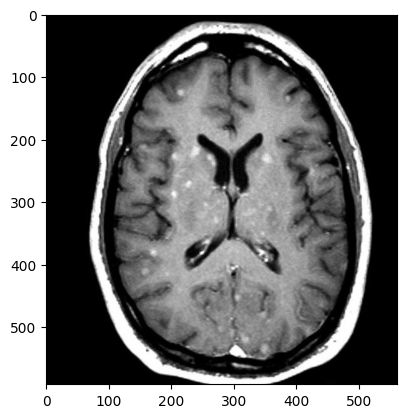

In [4]:
img = cv2.imread(r'/home/shatnawi/Desktop/Projects/jupyter-for-tumor-ai/first ai test/100_Images/4.jpg') # change this to image dir
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

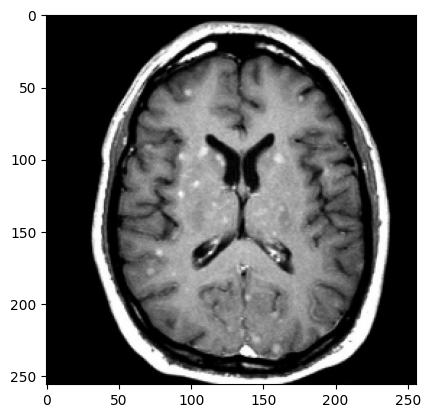

In [5]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [6]:
np.expand_dims(resize, 0)

array([[[[0.     , 0.     , 0.     ],
         [0.     , 0.     , 0.     ],
         [0.     , 0.     , 0.     ],
         ...,
         [0.     , 0.     , 0.     ],
         [0.     , 0.     , 0.     ],
         [0.     , 0.     , 0.     ]],

        [[0.     , 0.     , 0.     ],
         [0.     , 0.     , 0.     ],
         [0.     , 0.     , 0.     ],
         ...,
         [0.     , 0.     , 0.     ],
         [0.     , 0.     , 0.     ],
         [0.     , 0.     , 0.     ]],

        [[0.     , 0.     , 0.     ],
         [0.     , 0.     , 0.     ],
         [0.     , 0.     , 0.     ],
         ...,
         [0.     , 0.     , 0.     ],
         [0.     , 0.     , 0.     ],
         [0.     , 0.     , 0.     ]],

        ...,

        [[0.     , 0.     , 0.     ],
         [0.     , 0.     , 0.     ],
         [0.     , 0.     , 0.     ],
         ...,
         [0.     , 0.     , 0.     ],
         [0.     , 0.     , 0.     ],
         [0.71875, 0.71875, 0.71875]],

        [[

In [13]:
modelpath = r'/home/shatnawi/Desktop/Projects/jupyter-for-tumor-ai/first ai test/!models'
modelname = 'trained-model_30.May.2024.16.22.23.564930_1024epochs.h5'

In [14]:
def load_trained_model():
    model_path = os.path.join(modelpath, modelname)
    model = tf.keras.models.load_model(model_path, compile=False)
    return model

In [15]:
model = load_trained_model()

In [16]:
predictit = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


In [17]:
if predictit > 0.5 and predictit <= 1: 
    print(f'Predicted class is No Tumor')
elif predictit < 0.5 and predictit >= 0:
    print(f'Predicted class is Brain Tumor')
elif predictit == 0.5:
    print(f'Netural')
else:
    print(f'Bugged Code?!')

Predicted class is Brain Tumor
